In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
from sklearn.linear_model import LinearRegression

In [64]:
file = 'C:/Astrolab/gaia-binary/NewGaia/Pri_EDR3.csv'
df = pd.read_csv(file)
df.head()

,PriID,PriRA,PriRAdeg,PriDec,PriDecdeg,PripmRA,PripmDEC,PriV,PriV-J,SecID,...,phot_g_mean_flux_corrected,phot_bp_rp_excess_factor_corrected,ra_epoch2000_error,dec_epoch2000_error,ra_dec_epoch2000_corr,angDist,PM_Pri_RA_error,PM_Pri_DEC_error,PM_Sec_RA_error,PM_Sec_DEC_error
0,PMI00025-4644,02:35.7,0.648583,-46:44:52.0,-46.747778,0.150,-0.049,16.69,2.47,PMI00026-4644,...,7347.86,-0.004,0.4371,0.6153,-0.1110,0.152025,-2.448,39.896,2.448,39.896
1,PMI00329+1805,32:55.8,8.232500,+18:05:52.9,18.098028,0.095,-0.065,16.08,2.44,PMI00329+1805-2,...,10058.30,-0.002,0.7269,0.5223,0.2667,0.090673,-10.128,4.868,10.128,4.868
2,PMI00422+0731E,42:15.2,10.563458,+07:31:18.7,7.521861,0.169,-0.068,15.31,2.14,PMI00422+0731W,...,27193.00,0.002,0.5403,0.3625,0.2337,0.092694,4.800,5.418,4.800,5.418
3,PMI00592+0705N,59:17.8,14.824208,+07:05:56.4,7.099000,0.116,-0.003,14.06,1.48,PMI00592+0705S,...,61682.60,0.009,0.6317,0.4741,0.5655,0.106370,-1.563,8.972,14.563,5.028
4,NLTT3847,09:29.0,17.370708,-05:07:25.3,-5.123694,0.743,0.044,13.43,1.78,NLTT3849,...,34403.40,0.011,0.4563,0.4360,0.3172,0.104674,-63.786,55.427,63.786,55.427


In [165]:
def stats(a):
    mean = stat.mean(a)
    std = stat.stdev(a)
    s = 'Mean: '+ str(mean) +  ', Std Dev: ' + str(std)
    print(s)
    return s
def hist(a,b,bins,title,save=False):
    plt.hist(a, bins, alpha=0.25, label='RA_Error', color = 'b')
    plt.hist(b, bins, alpha=0.25, label='DEC_Error', color = 'g')
    plt.legend(loc='upper right')
    ra = stats(a)
    dec = stats(b)
    plt.title(title+ '\n RA ' + ra + '\n DEC ' + dec)
    plt.xlabel('mac/year')
    plt.ylabel('count')
    
    fig = plt.figure(1)
    
    rect = fig.patch
    rect.set_facecolor("white")
    
    if save:
        plt.savefig(title+'.png', dpi = 100, facecolor=fig.get_facecolor(), edgecolor='none')
    plt.show()
def parallax2(P,S,Pe,Se, labels, save=False):
    plt.scatter(P,S, s = 10, c = 'r')
    plt.errorbar(P,S, xerr = Pe, yerr = Se, fmt=".r" ,color = 'r')
    plt.plot([0,40],[0,40],c='r')
    #plt.errorbar(P,S, yerr = Se, fmt="o",color = 'r')
    plt.title('PRI vs SEC parallax')
    plt.xlabel('PRI_parralax')
    plt.ylabel('SEC_parralax')
    
    fig = plt.figure(1)
    fig.set_size_inches(18.5, 10.5)
    rect = fig.patch
    rect.set_facecolor("white")
    for i, txt in enumerate(labels):
        plt.annotate(txt, (P[i], S[i]))
    if save:
        plt.savefig('PRI vs SEC parallax'+'.png', dpi = 100, facecolor=fig.get_facecolor(), edgecolor='none')
    plt.show()
    
    def parallax(P,S,Pe,Se,label = None, anns = [], save=False):
        plt.scatter(P,S, s = 10, c = 'r')
        plt.errorbar(P,S, xerr = Pe, yerr = Se, fmt=".r" ,color = 'r')
        plt.plot([0,40],[0,40],c='r')
        #plt.errorbar(P,S, yerr = Se, fmt="o",color = 'r')
        plt.title('PRI vs SEC parallax')
        plt.xlabel('PRI_paralax')
        plt.ylabel('SEC_paralax')

        fig = plt.figure(1)
        fig.set_size_inches(18.5, 10.5)
        rect = fig.patch
        rect.set_facecolor("white")
        if len(anns)!=0: 
            for i in anns:
                plt.annotate(label[i], (P[i], S[i]))
        if save:
            plt.savefig('PRI vs SEC parallax DR2'+'.png', dpi = 100, facecolor=fig.get_facecolor(), edgecolor='none')
        plt.show()
    

In [65]:
RA_Er = df['PM_Pri_RA_error'].to_numpy()
DEC_Er = df['PM_Pri_DEC_error'].to_numpy()

Mean: 2.399225, Std Dev: 19.566065128353273
Mean: 1.179875, Std Dev: 20.255439192233112


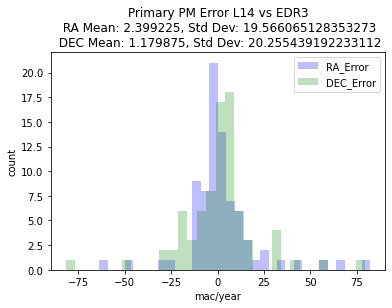

In [66]:
hist(RA_Er,DEC_Er,32,'Primary PM Error L14 vs EDR3', True)

Mean: 2.48474358974359, Std Dev: 19.787400332873442
Mean: 1.3418846153846153, Std Dev: 20.756176253703984


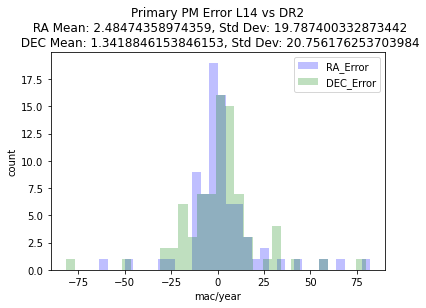

In [63]:
file = 'C:/Astrolab/gaia-binary/NewGaia/DR2.csv'
df = pd.read_csv(file)
df.head()
RA_Er = df['PM_Pri_RA_error'].to_numpy()
DEC_Er = df['PM_Pri_DEC_error'].to_numpy()
hist(RA_Er,DEC_Er,32,'Primary PM Error L14 vs DR2', True)

In [164]:
file_p = 'C:/Astrolab/gaia-binary/NewGaia/Pri_EDR3.csv'
dfp = pd.read_csv(file_p)
file_s = 'C:/Astrolab/gaia-binary/NewGaia/Sec_EDR3.csv'
dfs = pd.read_csv(file_s)

In [138]:
Pri = dfp['parallax'].to_numpy()
Sec = dfs['parallax'].to_numpy()
Pri_e = dfp['parallax_error'].to_numpy()
Sec_e = dfs['parallax_error'].to_numpy()
labels = dfp['PriID'].to_numpy()

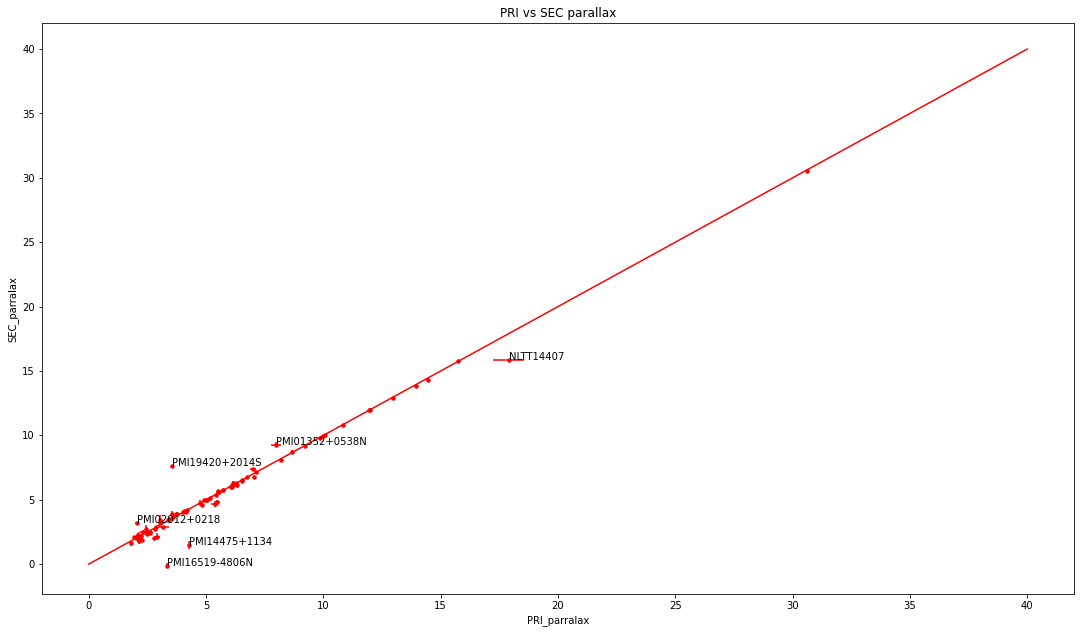

In [162]:

parallax(Pri,Sec,Pri_e,Sec_e,labels,[10,67,61,64,8,26], True)

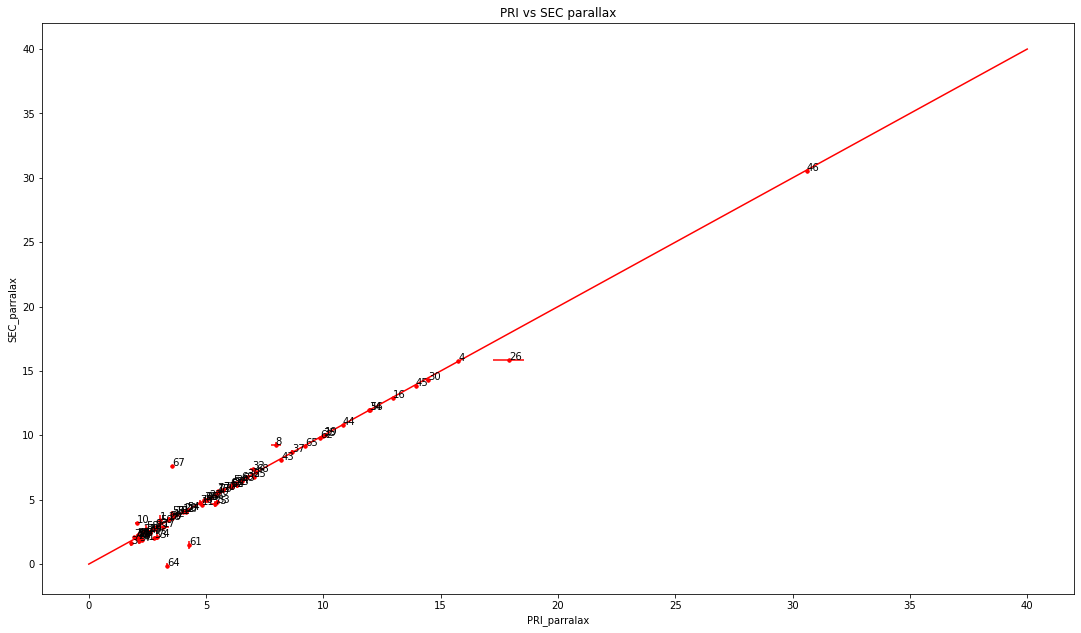

In [159]:
parallax2(Pri,Sec,Pri_e,Sec_e,list(range(80)))

In [167]:
file = 'C:/Astrolab/gaia-binary/NewGaia/DR2.csv'
dr2 = pd.read_csv(file)
Pri = dr2['GPRI_parallax'].to_numpy()
Sec = dr2['GSEC_parallax'].to_numpy()
Pri_e = dr2['GPRI_parallax_error'].to_numpy()
Sec_e = dr2['GSEC_parallax_error'].to_numpy()
labels = dr2['PriID'].to_numpy()

KeyError: 'GSEC_parallax'

In [ ]:
parallax(Pri,Sec,Pri_e,Sec_e,labels,[10,67,61,64,8,26], True)